In [2]:
# Dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [3]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [4]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [5]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
month_june = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()

In [6]:
#  3. Convert the June temperatures to a list.
june_result = [date for date in month_june]

print(june_result)

[('2010-06-01', 78.0), ('2010-06-02', 76.0), ('2010-06-03', 78.0), ('2010-06-04', 76.0), ('2010-06-05', 77.0), ('2010-06-06', 78.0), ('2010-06-07', 77.0), ('2010-06-08', 78.0), ('2010-06-09', 78.0), ('2010-06-10', 79.0), ('2010-06-11', 78.0), ('2010-06-12', 78.0), ('2010-06-13', 78.0), ('2010-06-14', 77.0), ('2010-06-15', 78.0), ('2010-06-16', 78.0), ('2010-06-17', 77.0), ('2010-06-18', 77.0), ('2010-06-19', 82.0), ('2010-06-20', 78.0), ('2010-06-21', 78.0), ('2010-06-22', 78.0), ('2010-06-23', 78.0), ('2010-06-24', 78.0), ('2010-06-25', 77.0), ('2010-06-26', 76.0), ('2010-06-27', 78.0), ('2010-06-28', 78.0), ('2010-06-29', 78.0), ('2010-06-30', 78.0), ('2011-06-01', 77.0), ('2011-06-02', 78.0), ('2011-06-03', 73.0), ('2011-06-04', 70.0), ('2011-06-05', 76.0), ('2011-06-06', 77.0), ('2011-06-07', 77.0), ('2011-06-08', 77.0), ('2011-06-09', 77.0), ('2011-06-10', 78.0), ('2011-06-11', 77.0), ('2011-06-12', 77.0), ('2011-06-13', 78.0), ('2011-06-14', 78.0), ('2011-06-15', 77.0), ('2011-06

In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_result_df = pd.DataFrame(june_result, columns=["Date", "June Temps"])

In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_result_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000.]),
 [Text(-250.0, 0, '2016-06-22'),
  Text(0.0, 0, '2010-06-01'),
  Text(250.0, 0, '2011-06-02'),
  Text(500.0, 0, '2012-06-05'),
  Text(750.0, 0, '2013-06-10'),
  Text(1000.0, 0, '2014-06-14'),
  Text(1250.0, 0, '2015-06-21'),
  Text(1500.0, 0, '2016-06-29'),
  Text(1750.0, 0, ''),
  Text(2000.0, 0, '')])

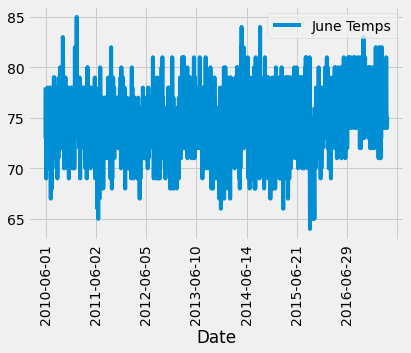

In [9]:
june_result_df.set_index(june_result_df ["Date"], inplace = True)

june_result_df.drop('Date', inplace=True, axis=1)

june_result_df = june_result_df.sort_index()

june_result_df.plot()
plt.xticks(rotation = 90)

,June Precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


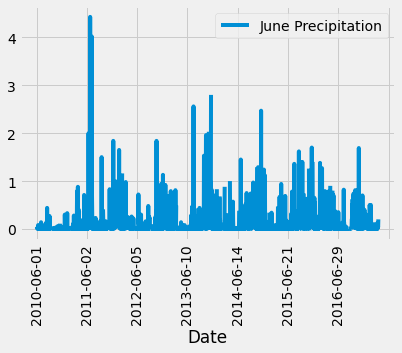

In [10]:
#Extra analysis on precipitation for Deliverable 3

june_prcp =  session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 6).all()

june_prcp_df = pd.DataFrame(june_prcp, columns = ["Date", "June Precipitation"])

june_prcp_df.set_index(june_prcp_df ["Date"], inplace = True)

june_prcp_df.drop('Date', inplace=True, axis=1)

june_prcp_df = june_prcp_df.sort_index()

june_prcp_df.plot()
plt.xticks(rotation = 90)

june_prcp_df.describe()

## D2: Determine the Summary Statistics for December

In [11]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
month_dec = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()

In [12]:
# 7. Convert the December temperatures to a list.
dec_result = [date for date in month_dec]

print(dec_result)

[('2010-12-01', 76.0), ('2010-12-03', 74.0), ('2010-12-04', 74.0), ('2010-12-06', 64.0), ('2010-12-07', 64.0), ('2010-12-08', 67.0), ('2010-12-09', 77.0), ('2010-12-10', 66.0), ('2010-12-11', 69.0), ('2010-12-12', 68.0), ('2010-12-13', 68.0), ('2010-12-14', 71.0), ('2010-12-15', 74.0), ('2010-12-16', 67.0), ('2010-12-17', 66.0), ('2010-12-18', 69.0), ('2010-12-19', 71.0), ('2010-12-23', 70.0), ('2010-12-24', 70.0), ('2010-12-26', 74.0), ('2010-12-27', 74.0), ('2010-12-28', 71.0), ('2010-12-29', 75.0), ('2010-12-30', 75.0), ('2010-12-31', 72.0), ('2011-12-01', 69.0), ('2011-12-02', 68.0), ('2011-12-03', 73.0), ('2011-12-04', 74.0), ('2011-12-05', 73.0), ('2011-12-06', 73.0), ('2011-12-07', 73.0), ('2011-12-08', 73.0), ('2011-12-09', 71.0), ('2011-12-10', 73.0), ('2011-12-11', 73.0), ('2011-12-12', 77.0), ('2011-12-13', 72.0), ('2011-12-14', 71.0), ('2011-12-15', 73.0), ('2011-12-16', 70.0), ('2011-12-17', 73.0), ('2011-12-18', 69.0), ('2011-12-19', 74.0), ('2011-12-20', 72.0), ('2011-12

In [13]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_result_df = pd.DataFrame(dec_result, columns = ["Date", "December Temps"])

In [14]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_result_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.]),
 [Text(-250.0, 0, '2015-12-23'),
  Text(0.0, 0, '2010-12-01'),
  Text(250.0, 0, '2011-12-02'),
  Text(500.0, 0, '2012-12-06'),
  Text(750.0, 0, '2013-12-10'),
  Text(1000.0, 0, '2014-12-12'),
  Text(1250.0, 0, '2015-12-19'),
  Text(1500.0, 0, '2016-12-29'),
  Text(1750.0, 0, '')])

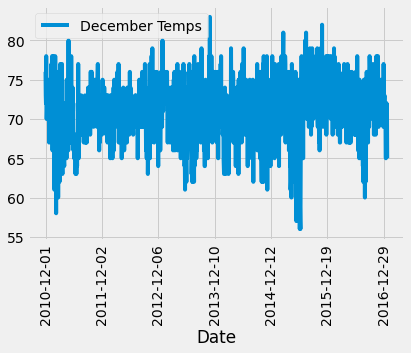

In [15]:
dec_result_df.set_index(dec_result_df ["Date"], inplace = True)

dec_result_df.drop('Date', inplace=True, axis=1)

dec_result_df = dec_result_df.sort_index()

dec_result_df.plot()
plt.xticks(rotation = 90)

,December Precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000


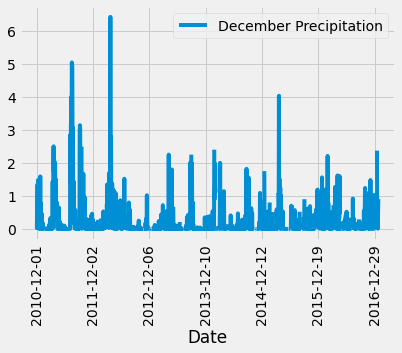

In [16]:
#Extra analysis on precipitation for Deliverable 3

dec_prcp =  session.query(Measurement.date, Measurement.prcp).filter(extract('month', Measurement.date) == 12).all()

dec_prcp_df = pd.DataFrame(dec_prcp, columns = ["Date", "December Precipitation"])

dec_prcp_df.set_index(dec_prcp_df ["Date"], inplace = True)

dec_prcp_df.drop('Date', inplace=True, axis=1)

dec_prcp_df = dec_prcp_df.sort_index()

dec_prcp_df.plot()
plt.xticks(rotation = 90)

dec_prcp_df.describe()